In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

### Loading Data

This dataset is a daily record of the number of bicycles crossing into or out if Manhattan via one of the East River bridges over 1 month.

Here is the linke for the dataset on kaggle: 
https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings

In [2]:
nyc_bike_data = pd.read_csv("nyc-east-river-bicycle-counts.csv", index_col='Date', parse_dates = True)

In [3]:
nyc_bike_data.head()

,Unnamed: 0,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,,,
2016-04-01,0,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
2016-04-02,1,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2016-04-03,2,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
2016-04-04,3,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
2016-04-05,4,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [4]:
# Renaming some of the columns
nyc_bike_data = nyc_bike_data.rename(columns={"High Temp (°F)": "HighTemp", "Low Temp (°F)": "LowTemp",})

In [5]:
nyc_bike_data.dtypes

Unnamed: 0               int64
Day                     object
HighTemp               float64
LowTemp                float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

### Cleaning Data

In [6]:
# Checking for null values and dropping or handling them if any
np.sum(nyc_bike_data.isnull())

Unnamed: 0             0
Day                    0
HighTemp               0
LowTemp                0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
dtype: int64

In [7]:
# Deleting useless and duplacte columns
# The column "Unnamed: 0" has no use
# The column "Day" is a duplicate if column "Date" that is set as index for the dataframe
nyc_bike_data = nyc_bike_data.drop(columns=["Unnamed: 0", "Day"])

In [8]:
# Checking for inconsistent values in the "Precipitation" column
Precipitation = nyc_bike_data["Precipitation"].unique()
Precipitation.sort()
Precipitation

array(['0', '0.01', '0.05', '0.09', '0.15', '0.16', '0.2', '0.24',
       '0.47 (S)', 'T'], dtype=object)

In [9]:
# Replacing inconsistent values with consistent values
nyc_bike_data["Precipitation"] = nyc_bike_data["Precipitation"].replace(['0.47 (S)', 'T'], ['0.47', '0'])

In [10]:
# Changing the type of "Precipitation", "Brooklyn Bridge", "Williamsburg Bridge", "Queensboro Bridge" columns
nyc_bike_data["Precipitation"] = nyc_bike_data["Precipitation"].astype('float64')
nyc_bike_data["Brooklyn Bridge"] = nyc_bike_data["Brooklyn Bridge"].astype('int64')
nyc_bike_data["Williamsburg Bridge"] = nyc_bike_data["Williamsburg Bridge"].astype('int64')
nyc_bike_data["Queensboro Bridge"] = nyc_bike_data["Queensboro Bridge"].astype('int64')

In [11]:
# If we pay close attention, the data has 180 duplicated rows
# Only 30 rows are the original data
# dropping all duplicates
nyc_bike_data = nyc_bike_data[:30]

In [12]:
nyc_bike_data.head()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704,3126,4115,2552,11497
2016-04-02,55.0,48.9,0.15,827,1646,2565,1884,6922
2016-04-03,39.9,34.0,0.09,526,1232,1695,1306,4759
2016-04-04,44.1,33.1,0.47,521,1067,1440,1307,4335
2016-04-05,42.1,26.1,0.00,1416,2617,3081,2357,9471


### Analyzine Data

In [13]:
nyc_bike_data.describe()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,60.580000,46.413333,0.052333,2269.633333,4049.533333,4862.466667,3352.866667,14534.500000
std,11.347289,9.662502,0.103647,995.633241,1729.740976,1840.652747,1115.381263,5650.877227
min,39.900000,26.100000,0.000000,504.000000,997.000000,1440.000000,1306.000000,4335.000000
25%,55.500000,44.100000,0.000000,1511.250000,2744.250000,3425.500000,2480.750000,10071.250000
50%,62.100000,46.900000,0.000000,2379.500000,4165.000000,5194.000000,3477.000000,15292.500000
75%,68.000000,50.000000,0.080000,3104.000000,5249.750000,6021.250000,4172.750000,18281.250000
max,81.000000,66.000000,0.470000,3871.000000,6951.000000,7834.000000,5032.000000,23318.000000


In [14]:
nyc_bike_data.corr()

,HighTemp,LowTemp,Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
HighTemp,1.000000,0.823853,-0.345898,0.739377,0.720175,0.764336,0.727825,0.743344
LowTemp,0.823853,1.000000,-0.165441,0.464550,0.465097,0.534212,0.475725,0.492124
Precipitation,-0.345898,-0.165441,1.000000,-0.599514,-0.588419,-0.576076,-0.596254,-0.591079
Brooklyn Bridge,0.739377,0.464550,-0.599514,1.000000,0.983148,0.980463,0.976991,0.989339
Manhattan Bridge,0.720175,0.465097,-0.588419,0.983148,1.000000,0.989805,0.985867,0.996323
Williamsburg Bridge,0.764336,0.534212,-0.576076,0.980463,0.989805,1.000000,0.988852,0.996639
Queensboro Bridge,0.727825,0.475725,-0.596254,0.976991,0.985867,0.988852,1.000000,0.993391
Total,0.743344,0.492124,-0.591079,0.989339,0.996323,0.996639,0.993391,1.000000


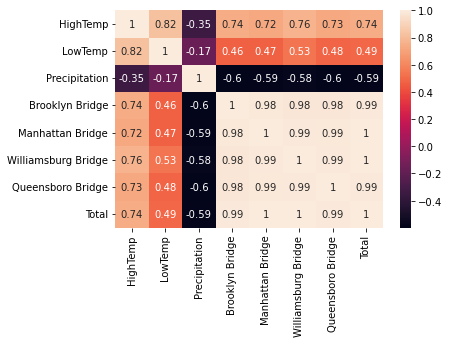

In [15]:
sns.heatmap(nyc_bike_data.corr(), annot=True)
plt.show()

The Heatmap above shows that the `Total` bicycle crossing has high positive correlations with the `HighTemp` and `LowTemp`, and it has a small negative correlation with the `Precipitation`.

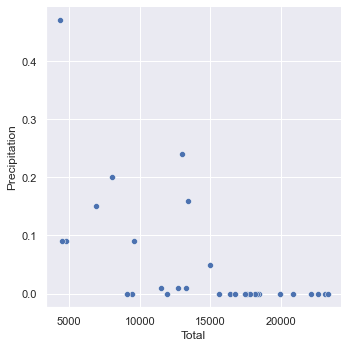

In [16]:
# Lets illustrate the negative correlation between Total bicycle crossing and Precipitation.
# As seen in the plot below, the number of crossings is higher on days where Precipitation is 0.
sns.set(rc={'figure.figsize':(12, 8)})
sns.set(style="darkgrid")
sns.relplot(x="Total", y="Precipitation", data=nyc_bike_data)

Let's plot all of the correlations with a regression. As shown below, `HighTemp` and `LowTemp` have high correlatinos with the Total crossings.

C:\Users\cafestock\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


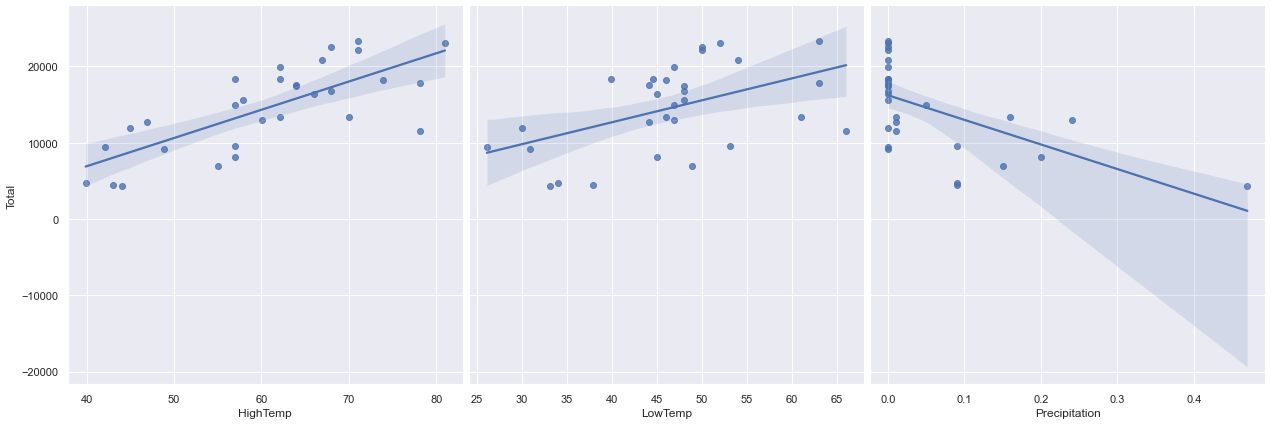

In [17]:
sns.pairplot(nyc_bike_data, x_vars=['HighTemp', 'LowTemp','Precipitation'], y_vars='Total', kind='reg', size=6)
plt.show()

### Poisson Regression

In [19]:
# Let's train a poisson regressor model to predict the amount of bicycle crossings based
# on the temperature and Precipitation
X = nyc_bike_data[["HighTemp", "LowTemp", "Precipitation"]]
y = nyc_bike_data['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [20]:
model = PoissonRegressor()
res = model.fit(X_train, y_train)
res.intercept_, res.coef_

(8.506855358519745, array([ 0.02383293, -0.00564701, -1.9650261 ]))

In [21]:
y_pred = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_pred, y_test))

3440.278137601053

In [22]:
df = pd.DataFrame({})
df = pd.concat([X_test, y_test], axis=1)
df['Predicted Total'] = y_pred.astype('int64')
df['Error'] = df['Predicted Total'] - df['Total']
df

,HighTemp,LowTemp,Precipitation,Total,Predicted Total,Error
Date,,,,,,
2016-04-22,78.1,63.0,0.00,17837,22302,4465
2016-04-23,70.0,61.0,0.16,13426,13579,153
2016-04-16,66.0,45.0,0.00,16375,18503,2128
2016-04-17,73.9,46.0,0.00,18180,22211,4031
2016-04-09,43.0,37.9,0.09,4510,9328,4818
2016-04-02,55.0,48.9,0.15,6922,10371,3449
2016-04-18,81.0,52.0,0.00,23090,25429,2339
2016-04-03,39.9,34.0,0.09,4759,8856,4097
2016-04-11,62.1,46.0,0.01,13312,16439,3127
